<a href="https://colab.research.google.com/github/FilLTP89/teaching/blob/master/MIFO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uncertainty modelling, quantification and non-parametric meta-modelling**

This notebook is intended to show some interesting applications of major ***uncertainty quantification*** and ***non-parametric meta-modelling*** in the field of Civil Engineering. 

In this context, ***Machine Learning (ML)*** gained huge momentum in the last few years.

ML was born from pioneering works in ***Artificial Intelligence, AI***. At its most basic, NL is the practice of using algorithms to ***parse data, learn from it, and then make a determination or prediction about something*** in the world.

But what is the difference between Artificial Intelligence, Machine Learning, and Deep Learning? 

Think of them as concentric circles, one including another.




In [5]:
from IPython.display import Image

In [2]:
Image(url= "https://blogs.nvidia.com/wp-content/uploads/2016/07/Deep_Learning_Icons_R5_PNG.jpg.png", width=1000)


1. The dream of those AI pioneers was to construct complex machines that possessed the same characteristics of human intelligence. This is the concept we think of as ***General AI*** - fabulous machines that have all our senses (maybe even more), all our reason, and think just like we do. 


***C-3PO, an iconic example of General AI***

In [3]:
Image(url="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fpt%2F6%2F66%2FC-3PO.jpg&f=1&nofb=1",width=200)

2. ***Narrow AI***: Technologies that are able to perform specific tasks as well as, or better than, we humans can. Examples of narrow AI are things such as image classification on a service like Pinterest and face recognition on Facebook.

3. ***Machine Learning*** is intended to *train* the machine using large amounts of data and algorithms that give it the ability to learn how to perform the task, rather than hand-coding software routines with a specific set of instructions to accomplish a particular task (as in General AI)

4. *** Deep Learning*** is a way to train the machine by *trial&error* approach, on a huge amount of data. Image recognition was the dragging field that led Deep Learning prevail.

The interest and the applications of Deep Learning approach exploded after 2012, due :
 1. to the large amount of *labelled* ***open-source data*** in different fields of science, economy, society ; 
 2. to the increasing computational power available (in particular, exploiting ***Graphic Process Units, GPU***, widely used in computer vision applications) granting fast access to large databases.


The latter issues shifted the paradigm that traditionally informed ML, steering the path of the so called ***Deep Learning*** approach (DL).

Check [this article](https://blogs.nvidia.com/blog/2016/07/29/whats-difference-artificial-intelligence-machine-learning-deep-learning-ai/) for further reading on this topic.

-----

`python3` offers a wide range of packages to perform ML and DL tasks:
+ [`numpy`](https://numpy.org/)
+ [`scipy`](https://docs.scipy.org/doc/scipy/reference/)
+ [`pandas`, Python Data Analysis Library](https://pandas.pydata.org/)
+ [`scikit-learn`, Machine Learning in Python](https://scikit-learn.org/stable/index.html)

To install the packages, use the command line (If you run it on `Repl.it`, switch to `Shell`):

`python3 -m pip install --upgrade pip`


`pip install numpy pandas scipy scikit-learn requests scikit-plot`

In  the following, we are going to exploit those tools to solve create non-parametric models to predict some quantities of interest. Let's upload those packages:

In [1]:
import requests
import numpy as np
import scipy
import pandas as pd
import sklearn as skl

import scikitplot as skplt
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib.colors import ListedColormap

%matplotlib inline 
# This is required only for notebooks

Before getting started, a few general hints:

1. `lambda` constructors: they are used in `python` to define anonymous functions ([see this link](https://realpython.com/python-lambda/))




In [5]:
arr = np.array([1.5, 2.8, 3.1])
scale = lambda x: x * 3 
scale(arr)

array([4.5, 8.4, 9.3])

2. Handle `pandas` dataframe

In [6]:
Image(url="https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg",width=500)

In [7]:
# Empty dataframe
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [8]:
# Basic database
data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df.describe())

              0
count  5.000000
mean   3.000000
std    1.581139
min    1.000000
25%    2.000000
50%    3.000000
75%    4.000000
max    5.000000


In [9]:
# Database with column labels
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [10]:
# Repartitioning data into dataframe
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print(df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


In [11]:
# Deal with indices
data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


3. plot data: ([see this link](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))



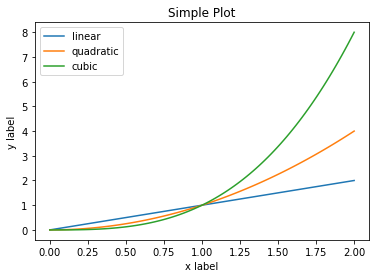

In [12]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

4. Design ***Neural Network*** with `sklearn`:

Minimal example of ***Multi-Layer Perceptron*** classifier $h_\theta$ for $N_y=2$ classes with 1 hidden layer (you can find the `python` code `ExampleMLPClassifier.py` on `Repl.it` repository.

MSE on test set: 0.14425


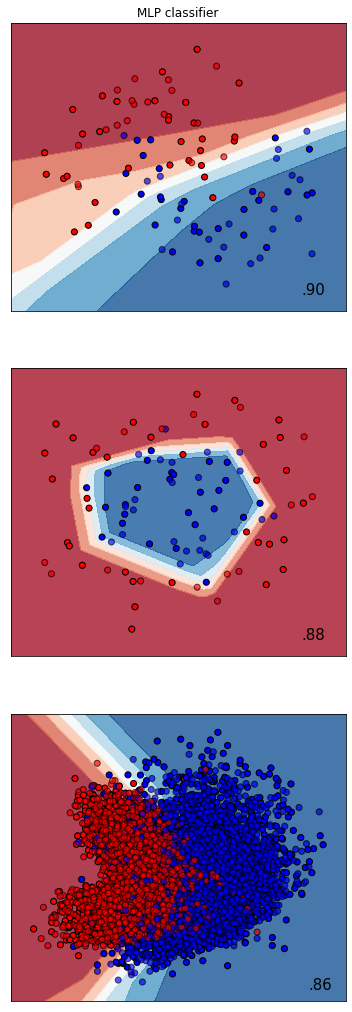

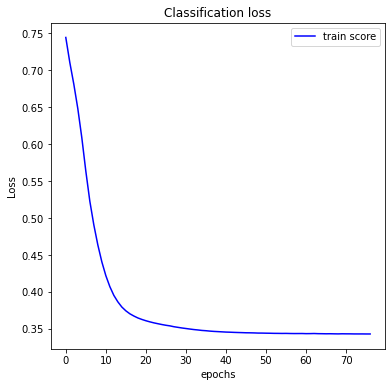

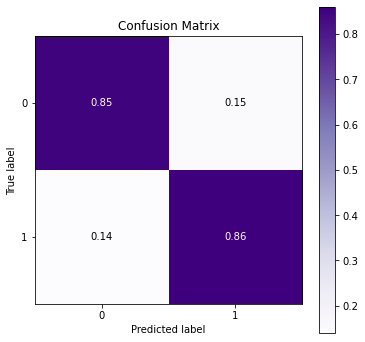

In [4]:
'''Model of fitting function for MLP classifier'''

"""
        Fit the model to the data
        
        Args:
            X (np.ndarray): features
            y (np.array): target labels
            
        Returns:
            obj: the MLPClassifierWrapper object
            
See: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
"""


# Load dataset for multi-class classification
X, y = make_classification(n_samples=10000, n_classes = 2, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2)

# Add noise to data
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)



# Add random datasets for testing (moons and circles)
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable ]


# Design the MLP classifier
number_of_layers=2 # number of hidden layers
hidden_layer_size= (5,5) # number of neurons per layer - must be tuple
activation = 'relu' # activation function (hyperbolic tangent)
alpha = 0.0001 # learning rate
max_iter = 10000 # maximum number of epochs of training
clf = MLPClassifier(activation=activation,hidden_layer_sizes=hidden_layer_size,
                        alpha=alpha,random_state=0,max_iter=max_iter,warm_start=False)
#reg = MLPRegressor(activation=activation,hidden_layer_sizes=hidden_layer_size,
#                        alpha=alpha,random_state=0,max_iter=max_iter,warm_start=False)
#clf = KNeighborsClassifier(n_neighbors=2)
figure = plt.figure(figsize=(6,18))
i = 1
h = .02  # step size in the mesh
# iterate over datasets
train_score = []
test_score = []

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    
    # Scale dataset
    X = StandardScaler().fit_transform(X)
    
    # Split into train and test dataset
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
        
    # Compute Classifier score
    # The fit function runs the SGD for each epoch and training sample
    clf.fit(X_train, y_train)
    # Classification score (loss on the test dataset)
    test_score.append(clf.score(X_test, y_test))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title("MLP classifier")
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % test_score[-1]).lstrip('0'),
            size=15, horizontalalignment='right')
    


# Plot classification loss
figure = plt.figure(figsize=(6, 6))
ax= plt.subplot(1, 1, 1)
ax.plot(clf.loss_curve_,color='blue',label="train score")
ax.legend()
ax.set_title("Classification loss")
ax.set_xlabel("epochs")
ax.set_ylabel("Loss")



# Predict test dataset and draw confusion matrix
y_pred = clf.predict(X_test)
print('MSE on test set: {}'.format((np.abs(y_pred-y_test)**2).mean()))

figure = plt.figure(figsize=(6, 6))
ax= plt.subplot(1, 1, 1)
skplt.metrics.plot_confusion_matrix(y_pred, y_test,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax);




## Try it yourself!

The standard 1-layer MLP classifier has poor performances... Let's try to improve them:

1. Increase the `number_of_layers=1` to `number_of_layers=3`, keeping `hidden_layer_size=(2,2,2)`. Does the prediction improve? What's the score on the test sample?

2. Increase the number of neurons per hidden layers to `hidden_layer_size=(10,5,2)`. Does the prediction improve?
    
3. Try to increase the number of samples to `n_samples=10000`. Does the prediction degrade? Do you observe any overfitting?
    
4. Compare the `MLPClassifier` with `knn = KNeighborsClassifier(n_neighbors=2)`

----

----

----

----

## Task 1: Non-linear regressions

The aim of this task is to get acquainted with non-linear polynomial regressions. In this task, the following *kindergarten* equation is considered:

$$f(x) = \sin(30(x-0.9)^4)\cos(2(x-0.9))+\frac{x-0.9}{2}$$

Given the equation above, solve the following issues:

1.  Plot $f(x)$ and evaluate it at 100 random points $x_i\in\left[0,1\right]$ (hint: check [`numpy` random sampling](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)).
2. Using [`numpy.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) or [`sklearn fit/predict` tool](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html), fit the selected points for different polynomial orders (hint: 3,4,5,... or piece-wise polynomials). Show the fitting improvements obtained when changing the polynomial order.
3. How the fit improves when considering 10, 100, 1000 random points?
4.  Design a meta-model based on ***Multi-Layer Perceptron (MLP)*** to fit the curve sampled with 10, 100, 1000 points respectively. Use the least number of layers and neurons possible (hint: use the [`sklearn.neural_network.MLPRegressor`](http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/).

In [ ]:
from sklearn.neural_network import MLPRegressor
X = np.rand

## Task 2: Non-linear parametric meta-model - Real case example

Finally a real case of application of a non-linear parametric meta-model in earthquake engineering will be studied in this section. The main idea here is to propose a surrogate model$*$ used to replace a more expensive finite element model (FEM) of a masonry building.

* Surrogate Model: An analytical function or numerical model used to provide a rapid approximation of a more expensive model: e.g. analytical model, finite-element model, among others).

The masonry building analyzed in this work is illustrated in [Figure](https://github.com/FilLTP89/teaching/blob/master/imgs/masonry_building.png). The behavior of this structure is simulated on the basis of non-linear dynamic FE analysis, all details of the model are well described in [1]. Using the FEM model, the inter-storey drifts of the building were calculated using 168 different earthquakes. Those inter-storey drift simulations represent the Engineering Demand parameters ED (matrix of $[168\times 1]$) and they were computed by inputting 168 stochastic realizations of earthquake time-histories, obtained combining 13 different Intensity Measures (IM) proxies (IM: matrix of $[168\times13]$). 

The input databases are in file `mansonry_building_database.csv` [you can download here](https://github.com/FilLTP89/teaching/blob/master/datasets/mansonry_building_database.csv).

You can find the template code on `Repl.it` (`ExTask2.py`).

In [20]:
link_to_mat_file="https://raw.githubusercontent.com/FilLTP89/teaching/master/datasets/mansonry_building_database.csv"
df = pd.read_csv(link_to_mat_file)
df.describe()




,Unnamed: 0,ED,IM1,IM2,IM3,IM4,IM5,IM6,IM7,IM8,IM9,IM10,IM11,IM12,IM13
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,83.500000,0.802470,0.568265,4.905019,0.412094,0.251099,0.240238,4.799137,0.376489,0.351521,0.195683,6.273273,0.219951,0.163938,0.005479
std,48.641546,0.404459,0.813978,3.266402,0.323955,0.157311,0.192276,3.458474,0.253011,0.281258,0.208994,2.924530,0.207705,0.109171,0.003649
min,0.000000,0.065913,0.008812,0.411530,0.086700,0.071996,0.060000,0.615000,0.069849,0.062812,0.010257,2.257807,0.008619,0.013754,0.000460
25%,41.750000,0.523530,0.067664,2.579337,0.181336,0.144031,0.120000,2.106250,0.191385,0.148183,0.047384,4.251499,0.057951,0.086208,0.002881
50%,83.500000,0.736094,0.196253,4.143671,0.268389,0.191290,0.170000,3.940000,0.286934,0.224549,0.099942,5.661051,0.136046,0.138492,0.004629
75%,125.250000,1.029712,0.711910,6.225383,0.546545,0.333900,0.290000,6.265000,0.515645,0.508608,0.271853,7.434519,0.332636,0.208068,0.006954
max,167.000000,2.007557,4.670694,21.990980,1.823305,1.141430,1.180000,15.320000,1.335488,1.271288,0.957712,16.809486,0.901623,0.734994,0.024565


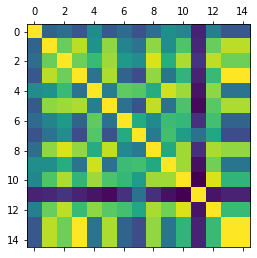

In [19]:
plt.matshow(df.corr())


1. Plot each one of the input parameters (IM) with respect to the drift (ED). Visually analyze which proxy is more correlated to the output (hint: consider a log-log scale for your analysis).

2. Calculate the correlation matrix of the input (IM) and output (ED) variables for the 168 earthquakes of the complete database. Provide the correlation matrix $[13\times13]$ (13 inputs) that describes the correlation between the IMs and the correlation of each component to the ED vector. Select 5 parameters based on the correlation matrix (hint: be careful with the redundant parameters. Use [`pandas.Dataframe.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)).


3. Do those variables correspond to the first Principal Components of the dataset? Use the `scikit-learn` tool [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Compute the cumulative explained variance as a function of the PCA components.

Remind that the two first normalized PCs $(\mathbf{a}_1,\mathbf{a}_2)$ define a plane where the dataset features, projected onto those components, show the maximum dispersion! 

Try it yourself, by running this minimum working example of `sklearn.decomposition.PCA` (on `Repl.it` you can find the following code in file `ExamplePCA.py`). Two datasets are created, using multivariate normal distribution with diagonal and full covariance matrices.

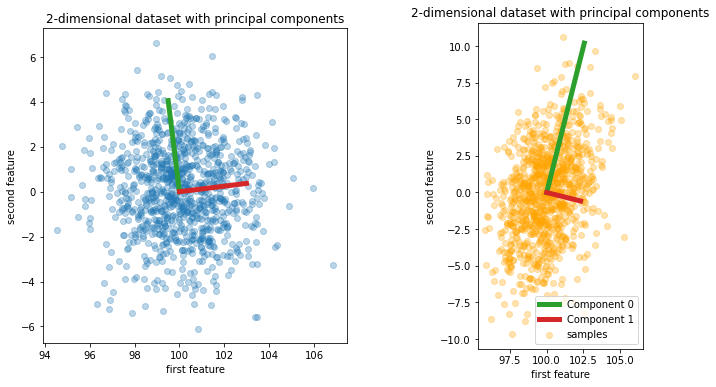

In [21]:
#See: https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(1)
n_samples = 1000

# Diagonal Covariance Matrix
covDiag = [[3, 0],
       [0, 4]]

# Full Covariance Matrix
covFull = [[3, 2],
           [2, 10]]


mean = [100, 0]

# Create Multivariate normal distribution
Xdiag = rng.multivariate_normal(mean=mean, cov=covDiag, size=n_samples)
Xfull = rng.multivariate_normal(mean=mean, cov=covFull, size=n_samples)

# Compute the 2 first Principal components
pcaDiag = PCA(n_components=2).fit(Xdiag)
pcaFull = PCA(n_components=2).fit(Xfull)


# Plot the data distribution and first two PC
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
plt.scatter(Xdiag[:, 0], Xdiag[:, 1], alpha=.3, label='samples')
for i, (comp, var) in enumerate(zip(pcaDiag.components_, pcaDiag.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([mean[0]+0,mean[0]+ comp[0]], [mean[1]+0, mean[1]+comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')

ax = fig.add_subplot(1,2,2)
plt.scatter(Xfull[:, 0], Xfull[:, 1], alpha=.3, label='samples',color='orange')
for i, (comp, var) in enumerate(zip(pcaFull.components_, pcaFull.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot([mean[0]+0,mean[0]+ comp[0]], [mean[1]+0, mean[1]+comp[1]], label=f"Component {i}", linewidth=5,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')

plt.legend()
plt.show()

4. Design a MLP regressor using the 5 previously selected PC. Compare the predictions obtained for different tests. Does one hidden layer suffice for the task at stake? Subdivide the dataset as follows: 80\% Training, 20\% Testing.


5. Calculate the squared correlation coefficient ($Q^{2}$) and the root mean square error ($\text{RMSE}$) for the each of the MLP prediction.

$$ 
  Q^{2}(y_{i},y_i^{pred})=1-\dfrac{\sum_{n=1}^{N} (y_i^{pred}-y_{i})^{2}}{\sum_{n=1}^{N} 		  (y_{i}-\mu_{y})^{2}}
$$
$$
	RMSE(y_{i},y_i^{pred})=\sqrt{\sum_{n=1}^{N} \frac{(y_i^{pred}-y_{i})^{2}}{N}}
$$

6. Propose your final model (how many neurons) based on the squared correlation coefficient ($Q^{2}$) and the root mean square error ($RMSE$). Justify your answer. 


7. Plot the histogram of the 168 output real values (ED). Then create a synthetic input database, by creating a 10,000 random samples of each one of the 5 input parameters within their original range and used them to predict 10,000 outputs with your final MLP. Overlap the histogram of the synthetic database 10,000 predictions (new outputs). Compare the median and the standard deviation of the real and the synthetic database. 


9. Why do you think surrogate models are important and widely used for statistical engineering application purposes?

## References

[1] Saez, E. Lopez-Caballero, F. and Modaressi Farahmand-Razavi, A. (2011) *Effect of the inelastic dynamic soil–structure interaction on the seismic vulnerability assessment*. Structural Safety 33 (2011) 51-63. doi:10.1016/j.strusafe.2010.05.004